***Valdez Garcia Karla Anali***

Simulación I

Ejemplo 4

07/06/2024

# Ejemplo: Flecha y cojinete

Una flecha será embonada en un cojinete como se muestra a continuación

<img src="https://github.com/Medetl/Simulacion/blob/main/Unidad%20II/cojinete.png?raw=1">

Si $x_1$ sigue una distribución normal con media $1.5$ y varianza $0.0016$, y $x_2$ esta misma distribución con media $1.48$ y varianza $0.0009$, determine:

a) La probabilidad de que haya interferencia.

b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de $0.01$, con un nivel de seguridad del $95\%.$

Vamos a resolver este problema, procurando seguir la metodología vista en el curso.

### 1. Identifique las variables

Tenemos dos: $x_1$ y $x_2$.

### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias

En el planteamiento ya se especifica que $x_1 \sim N(1.5, 0.04)$ y que $x_1 \sim N(1.48, 0.03)$.

### 4. Defina el modelo del sistema y los objetivos de la simulación

La diferencia $x_1 - x_2$ modela adecuadamente el sistema.

Si $x_2 - x_1 > 0$ el diametro de la flecha es más grande que el espacio en el cojinte y, por tanto, hay interferencia. De lo contrario, las piezas embonan sin problema.

Objetivo: determinar la frecuencia con que esto ocurre, lo cual nos da una esrimación de la probabilidad de interefrencia.

Una forma de implementarlo es mediante el siguiente código.

In [56]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [57]:
def interferencia():                #Esta función devuelve el valor 1 si hay interferencia o 0 si no la hay.
    interf=0
    x_1 = random.gauss(1.50,0.04)    #La funcion gauss genera un número que sigue una distribucion normal con
    x_2 = random.gauss(1.48,0.03)   # la media y la desvicion estandar especificados.
    if 0.0 < x_2 - x_1:
        interf += 1
    return interf

In [58]:
interferencia()

0

### 5. Diseñe el experimento

Para estimar la probabilidad de interferencia, ejecutamos $n$ veces la función anterior y calculamos de manera acumulativa
la probabilidad de interferencia.

In [59]:
def prob_inter(n):
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    inter = 0                       # estimada al contar las veces que hay interferencia y dividir entre las veces que
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        inter += interferencia()
        prob.append(inter/(i+1))
    return prob

In [60]:
X = prob_inter(800)                # Asignamos valores a n y realizamos el experimento

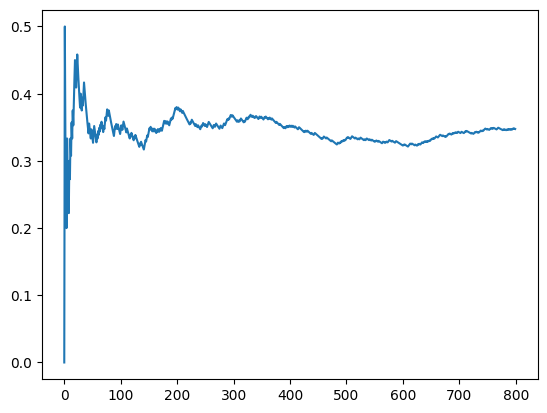

In [61]:
plt.plot(X)                         # La gráfica muestra que la convergencia está garantizada con 500 iteraciones
                                    # Sin embargo, diferentes ejecuciones darán resultados distintos

In [62]:
print(np.mean(X), np.std(X))

0.3452889391805824 0.02358141526464961


### 6. Repita el experimento $n$ veces

Una forma de hacerlo es mediante el siguiente codigo.

In [63]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = prob_inter(500)
        lista.append(np.mean(s))
    return lista

In [64]:
Y=modelo(120)

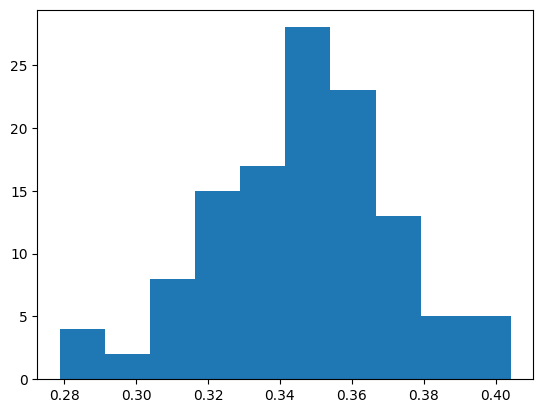

In [65]:
plt.hist(Y)
plt.show()

In [66]:
print(np.mean(Y), np.std(Y))

0.3463465599928457 0.025124376425466742


### Paso 7. Hallamos el intervalo de confianza.

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

In [67]:
np.mean(Y)

0.3463465599928457

In [68]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)

(0.33938243815098157, 0.3533106818347098)

### Para determinar el número de simulaciones

$$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

In [69]:
N = (2*np.std(X)*1.96/0.001)**2

In [70]:
print(N)

8544.996052909584


### Podemos comparar con la sulución analítica del problema.

Para ello usamos la teoría sobre la suma de variables con distribución normal.

In [71]:
norm.cdf(-0.04, -0.02, 0.05)

0.3445782583896758

In [72]:
norm.cdf(-0.04, -0.02, 0.05)-np.mean(Y)

-0.001768301603169875

***b)Solución Analítica***


Para determinar la probabilidad de interferencia, debemos considerar que la interferencia ocurre si el diámetro de la flecha  $X_1$ es mayor que el diámetro  $X_2$. Donde las distribuciones están definidas como:

$X_1 \sim N(1.5, 0.0016)$

$X_2 \sim N(1.48, 0.0009)$

Lo que nosotros queremos encontrar es $ P( z > x)= \phi (x)$




**Paso 1: Definir la Variable de Interferencia**

Ahora dado que nuestra restricción ocurre cuando $X_1 > X_2$, esto dado que no embonarían

$ \Rightarrow    X_2 > X_1 $

$ \Rightarrow  X_2 -  X_1 > 0 $

Así entonces dada la condición , haremos uso del ***Teorema de Suma y Resta de Variables Aletorias con una Distribución Normal*** que nos dice.

Sean  $ σ_{1} ,σ_{2},  μ_{1} ,μ_{2} \in \mathbb{R} , σ_{i} > 0   $

Entonces ***$X_1 \sim N(\mu_1, \sigma_1) + X_2 \sim N(\mu_2, \sigma_2) = X_1 + X_2 \sim \left( \mu_1 - \mu_2, \sqrt{\sigma_1^2 + \sigma_2^2} \right) $***

Obteniendo la Esperanza y Varianza, adaptandola a nuestra conidicón, entonces:

$ \Rightarrow \mu_{X_2} - \mu_{X_1} =1.48 - 1.5   = -0.02 $

$ \Rightarrow \sigma_{X_1}^2 + \sigma_{X_2}^2 = 0.0016 + 0.0009 = 0.0025 $

Obtenemos la Desviación Estándar:

$ \Rightarrow \sqrt{0.0025} = 0.05 $









***Paso 2: Calcular la Probabilidad de Interferencia***

Dado que queremos obtener la probabilidad $P(X_2 -  X_1 > 0)$: , estandarizaremos nuestra variable.

$P(X_2 -  X_1  > 0)$ .Realizando un cambio de variable, para facilitar los cálculos.

 Sea $ X = X_2 -  X_1 $


$ \Rightarrow P\left(\frac{X - \mu_X}{\sigma_X} > \frac{0 - 0.02}{0.05}\right) $

$= P\left(Z > \frac{-0.02}{0.05}\right) = P(Z > -0.4)$


Para calcular la probabilidad de interferencia, es decir, $ P(X > 0) $, primero estandarizamos $ X $ para obtener $ Z $:

$
Z = \frac{D - \mu_D}{\sigma_D} = \frac{0 - (-0.02)}{0.05} = \frac{0.02}{0.05} = 0.4
$

Entonces, la probabilidad de interferencia es:

$
P(X > 0) = 1 - P(Z \leq 0.4)
$

Consultando una tabla de valores de la distribución normal estándar, $ P(Z \leq 0.4) $ es aproximadamente $0.6554 $, entonces:

$
P(X > 0) = 1 - 0.6554 = 0.3446
$

Por lo tanto, la probabilidad de interferencia es aproximadamente $ 0.3446 $ Ó  $ 34.46\% $.



***b) Justificación del cálculo del intervalo de confianza y del número de corridas de la simulación.***

Notemos que Utilizamos la fórmula:
$
N > \left( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \right)^2
$
donde:

$\sigma$ es la desviación estándar de la variable $X$, que es 0.05.


$z_{\alpha/2}$ es el valor crítico de la distribución normal estándar para un nivel de confianza del 95\%, que es aproximadamente 1.96.

$\epsilon$ es la precisión deseada, que es 0.01.


Sustituyendo estos valores:


$
N > \left( \frac{2 \cdot 0.05 \cdot 1.96}{0.01} \right)^2 = \left( \frac{0.196}{0.01} \right)^2 = (19.6)^2 = 384.16 $



⇒N >384.16



Notemos que si coincide este resultado, ya que 384.19 corresponde al mínimo de simulaciones que tenemos que tener, donde nsootros obtuvimos 876 .

Es importante verificar y comparar el método en la práctica, varias veces para su comprobación.



***Cálculo del Intervalo de Confianza ***

Utilizamos la fórmula del intervalo de confianza:

$
\bar{x} - z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x} + z_{\alpha/2} \cdot \frac{s}{\sqrt{n}}
$

donde:


$\bar{x}$ es la media muestral.

$z_{\alpha/2}$ es el valor crítico de la distribución normal estándar.

$s$ es la desviación estándar muestral.

$n$ es el tamaño de la muestra.

Asi entonces tenemos considerando los valores de Y:


Cálculo del Error Estándar para $Y$

El error estándar de la media muestral es:

$
\text{SE}_Y = \frac{s}{\sqrt{n}} = \frac{0.00714}{\sqrt{50}} \approx 0.00101
$

Cálculo del Margen de Error para $Y$

El margen de error usando el valor crítico $z_{\alpha/2}$:

$
\text{ME}_Y = 1.96 \cdot 0.00101 \approx 0.00198
$


Cálculo del Intervalo de Confianza para $Y$:



Finalmente, el intervalo de confianza es:
$
0.3463 - 0.00198 < \mu < 0.3463 + 0.00198
$

Simplificando, obtenemos:
$
0.34432 < \mu < 0.34828
$





Este intervalo de confianza nos asegura que con un nivel de confianza del 95\%, el valor verdadero de la media $\mu$ estará dentro del rango calculado.
